### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액 
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

### 데이터 탐색

In [1]:
import pandas as pd

# csv 데이터 호출
path = "./datasets/customer_order_data.csv"
co_df = pd.read_csv(path)

display(co_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [2]:
# 데이터 정보 확인
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [3]:
co_df['Location'].value_counts()

Location
Tokyo       278
New York    247
London      246
Paris       229
Name: count, dtype: int64

#### 중복행 검사

In [4]:
co_df.duplicated().sum()

0

#### 결측치 검사

In [5]:
co_df.isna().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

### 데이터 전처리
- Recency: PurchaseDate를 통해 최근 구매 일자 확인
- Frequency: OrderID를 통해 누적 구매 횟수 확인
- Monetary: TransactionAmount를 통해 누적 금액 확인

In [6]:
# 불필요한 피처 drop
# co_df = co_df.drop(labels='ProductInformation', axis=1)
# co_df

In [7]:
# location이 다른지 확인...
recently_date = co_df[co_df['CustomerID'] == 1011]
recently_date

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
371,1011,2023-05-02,918.72,Product B,945619,London
482,1011,2023-05-08,210.30,Product B,781571,Paris


In [8]:
# 중복되는 CustomerID 개수 찾기
co_df.duplicated('CustomerID').sum()

54

#### Recency

In [9]:
# 날짜 데이터 datetime으로 형식 변환
co_df['PurchaseDate'] = pd.to_datetime(co_df['PurchaseDate'])
# 날짜 내림차순 정렬
co_df.sort_values(by=['PurchaseDate'], ascending=False)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
999,4759,2023-06-10,804.28,Product D,467544,New York
990,6570,2023-06-10,125.84,Product C,664032,Paris
981,6761,2023-06-10,571.97,Product B,690462,London
982,3213,2023-06-10,700.65,Product B,719531,Tokyo
983,2625,2023-06-10,765.11,Product B,377501,New York
...,...,...,...,...,...,...
1,2188,2023-04-11,463.70,Product A,176819,London
5,8483,2023-04-11,375.23,Product C,691194,Paris
6,8317,2023-04-11,272.56,Product B,826847,New York
7,6911,2023-04-11,433.33,Product C,963918,Tokyo


In [10]:
# 일자 현재 기준으로 변경하기
from datetime import datetime
# 현재 날짜 가져와서 담아주기
now_date = datetime.now()

# 현재 날짜에서 날짜 데이터를 빼주고 .dt.days로 일 단위만 가져오게 하기
# 찾아온 날짜는 data 라는 피처로 데이터 프레임에 추가하기
co_df['data'] = (now_date - co_df['PurchaseDate']).dt.days

# 사용이 끝난 피처는 삭제
co_df = co_df.drop(labels=['PurchaseDate'], axis=1)
co_df

,CustomerID,TransactionAmount,ProductInformation,OrderID,Location,data
0,8814,943.31,Product C,890075,Tokyo,353
1,2188,463.70,Product A,176819,London,353
2,4608,80.28,Product A,340062,New York,353
3,2559,221.29,Product A,239145,London,353
4,9482,739.56,Product A,194545,Paris,353
...,...,...,...,...,...,...
995,2970,759.62,Product B,275284,London,293
996,6669,941.50,Product C,987025,New York,293
997,8836,545.36,Product C,512842,London,293
998,1440,729.94,Product B,559753,Paris,293


In [11]:
# 최근 구매 일자 확인
new_df = co_df.groupby('CustomerID')['data'].min().reset_index(name='RecentlyDate')
new_df

,CustomerID,RecentlyDate
0,1011,326
1,1025,314
2,1029,293
3,1046,336
4,1049,306
...,...,...
941,9941,335
942,9950,331
943,9954,305
944,9985,350


#### Frequency

In [12]:
# 누적 구매 횟수 확인
new_df['orderCount'] = co_df.groupby('CustomerID')['OrderID'].count().reset_index()['OrderID']
new_df

,CustomerID,RecentlyDate,orderCount
0,1011,326,2
1,1025,314,1
2,1029,293,1
3,1046,336,1
4,1049,306,1
...,...,...,...
941,9941,335,1
942,9950,331,1
943,9954,305,1
944,9985,350,1


#### Monetary

In [13]:
# 누적 금액 확인
new_df['total'] = co_df.groupby('CustomerID').sum('TransactionAmount').reset_index()['TransactionAmount']
new_df

,CustomerID,RecentlyDate,orderCount,total
0,1011,326,2,1129.02
1,1025,314,1,359.29
2,1029,293,1,704.99
3,1046,336,1,859.82
4,1049,306,1,225.72
...,...,...,...,...
941,9941,335,1,960.53
942,9950,331,1,679.11
943,9954,305,1,798.01
944,9985,350,1,36.10


In [14]:
co_df.duplicated().sum()

0

### 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 프레임 복사
df_copy = new_df.copy()
# 정규화를 위해 CustomerID 피처 삭제
rfm = df_copy.drop(labels=['CustomerID'], axis=1)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

In [16]:
# 정규화된 데이터를 데이터 프레임으로 변환, 피처는 rfm과 동일하게 설정
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)


# (풀이 후 추가) 최근일수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
# rfm['RecentlyDate'] = 1 - rfm['RecentlyDate'] 
rfm

,RecentlyDate,orderCount,total
0,0.550000,0.5,0.471795
1,0.350000,0.0,0.146647
2,0.000000,0.0,0.292677
3,0.716667,0.0,0.358080
4,0.216667,0.0,0.090224
...,...,...,...
941,0.700000,0.0,0.400622
942,0.633333,0.0,0.281745
943,0.200000,0.0,0.331970
944,0.950000,0.0,0.010125


#### 고객의 종합 점수

In [17]:
# 고객의 종합 점수 추가
new_df['TotalScore'] = rfm['RecentlyDate'] + rfm['orderCount'] + rfm['total']
new_df

,CustomerID,RecentlyDate,orderCount,total,TotalScore
0,1011,326,2,1129.02,1.521795
1,1025,314,1,359.29,0.496647
2,1029,293,1,704.99,0.292677
3,1046,336,1,859.82,1.074747
4,1049,306,1,225.72,0.306891
...,...,...,...,...,...
941,9941,335,1,960.53,1.100622
942,9950,331,1,679.11,0.915078
943,9954,305,1,798.01,0.531970
944,9985,350,1,36.10,0.960125


In [18]:
import numpy as np

# 회원 등급 책정을 위해 백분위수 계산
# 각 백분위 수는 각 변수에 할당
l1, l2, l3, l4 = np.percentile(new_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.41412342508265365 0.6603278531560306 0.9635216193839449 1.1643879999324138


In [19]:
# 회원의 등급 책정을 위한 함수 선언
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [20]:
# 데이터 프레임에 Level 피처 추가(각 회원의 등급 추가)
new_df['Level'] = new_df['TotalScore'].apply(get_level)

In [21]:
new_df

,CustomerID,RecentlyDate,orderCount,total,TotalScore,Level
0,1011,326,2,1129.02,1.521795,1
1,1025,314,1,359.29,0.496647,4
2,1029,293,1,704.99,0.292677,5
3,1046,336,1,859.82,1.074747,2
4,1049,306,1,225.72,0.306891,5
...,...,...,...,...,...,...
941,9941,335,1,960.53,1.100622,2
942,9950,331,1,679.11,0.915078,3
943,9954,305,1,798.01,0.531970,4
944,9985,350,1,36.10,0.960125,3


In [22]:
# Level 피처의 값 변경
new_df['Level'] = new_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

In [23]:
new_df

,CustomerID,RecentlyDate,orderCount,total,TotalScore,Level
0,1011,326,2,1129.02,1.521795,VIP
1,1025,314,1,359.29,0.496647,Silver
2,1029,293,1,704.99,0.292677,Bronze
3,1046,336,1,859.82,1.074747,Diamond
4,1049,306,1,225.72,0.306891,Bronze
...,...,...,...,...,...,...
941,9941,335,1,960.53,1.100622,Diamond
942,9950,331,1,679.11,0.915078,Gold
943,9954,305,1,798.01,0.531970,Silver
944,9985,350,1,36.10,0.960125,Gold


In [24]:
# 등급에 따른 회원 명수 확인
print(new_df['Level'].value_counts())

Level
Gold       283
Bronze     190
Silver     189
Diamond    189
VIP         95
Name: count, dtype: int64


#### 주문 상품 확인

In [25]:
# 주문 상품 확인
# ', '을 구분점으로 두고 join 으로 연결해 주기
new_df['Product'] = co_df.groupby('CustomerID')['ProductInformation'].apply(lambda x: ', '.join(x)).reset_index()['ProductInformation']
new_df

,CustomerID,RecentlyDate,orderCount,total,TotalScore,Level,Product
0,1011,326,2,1129.02,1.521795,VIP,"Product B, Product B"
1,1025,314,1,359.29,0.496647,Silver,Product D
2,1029,293,1,704.99,0.292677,Bronze,Product D
3,1046,336,1,859.82,1.074747,Diamond,Product B
4,1049,306,1,225.72,0.306891,Bronze,Product A
...,...,...,...,...,...,...,...
941,9941,335,1,960.53,1.100622,Diamond,Product B
942,9950,331,1,679.11,0.915078,Gold,Product C
943,9954,305,1,798.01,0.531970,Silver,Product B
944,9985,350,1,36.10,0.960125,Gold,Product D


#### 주문 지역 확인

In [26]:
# 주문 지역 가져오기
# ', '을 구분점으로 두고 join 으로 연결해 주기
new_df['Location'] = co_df.groupby('CustomerID')['Location'].apply(lambda x: ', '.join(x)).reset_index()['Location']
new_df

,CustomerID,RecentlyDate,orderCount,total,TotalScore,Level,Product,Location
0,1011,326,2,1129.02,1.521795,VIP,"Product B, Product B","London, Paris"
1,1025,314,1,359.29,0.496647,Silver,Product D,New York
2,1029,293,1,704.99,0.292677,Bronze,Product D,New York
3,1046,336,1,859.82,1.074747,Diamond,Product B,Paris
4,1049,306,1,225.72,0.306891,Bronze,Product A,Tokyo
...,...,...,...,...,...,...,...,...
941,9941,335,1,960.53,1.100622,Diamond,Product B,Paris
942,9950,331,1,679.11,0.915078,Gold,Product C,Tokyo
943,9954,305,1,798.01,0.531970,Silver,Product B,Tokyo
944,9985,350,1,36.10,0.960125,Gold,Product D,New York


### 분석

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 회원 별 등급 분포 확인

<Axes: xlabel='Level', ylabel='count'>

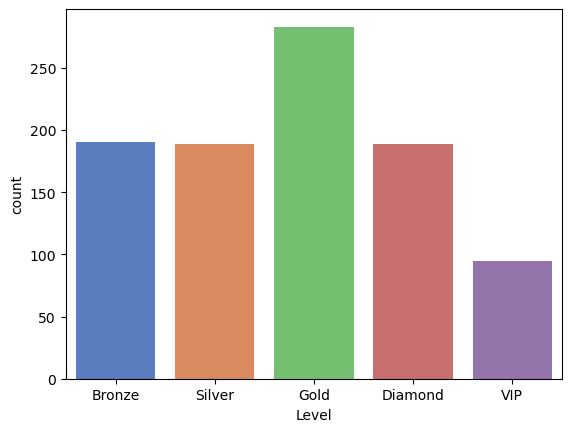

In [28]:
order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x='Level', data=new_df, palette='muted', order=order_columns)

##### 📌 회원 별 등급 분포
- 회원 등급 중 Gold 회원이 가장 많고, VIP 회원이 가장 적다.
- Gold 283명, Bronze 190명, Silver 및 Diamond 189명, VIP회원 95명 순으로 나타난다.

### 지역/판매상품 별 회원 등급 확인

In [29]:
# Location 피처의 데이터를 ', '로 구분하여 데이터를 분리하고, list 형식으로 저장
new_df['Location'] = new_df['Location'].str.split(', ')
new_df['Product'] = new_df['Product'].str.split(', ')
new_df

,CustomerID,RecentlyDate,orderCount,total,TotalScore,Level,Product,Location
0,1011,326,2,1129.02,1.521795,VIP,"[Product B, Product B]","[London, Paris]"
1,1025,314,1,359.29,0.496647,Silver,[Product D],[New York]
2,1029,293,1,704.99,0.292677,Bronze,[Product D],[New York]
3,1046,336,1,859.82,1.074747,Diamond,[Product B],[Paris]
4,1049,306,1,225.72,0.306891,Bronze,[Product A],[Tokyo]
...,...,...,...,...,...,...,...,...
941,9941,335,1,960.53,1.100622,Diamond,[Product B],[Paris]
942,9950,331,1,679.11,0.915078,Gold,[Product C],[Tokyo]
943,9954,305,1,798.01,0.531970,Silver,[Product B],[Tokyo]
944,9985,350,1,36.10,0.960125,Gold,[Product D],[New York]


<Axes: xlabel='Product', ylabel='count'>

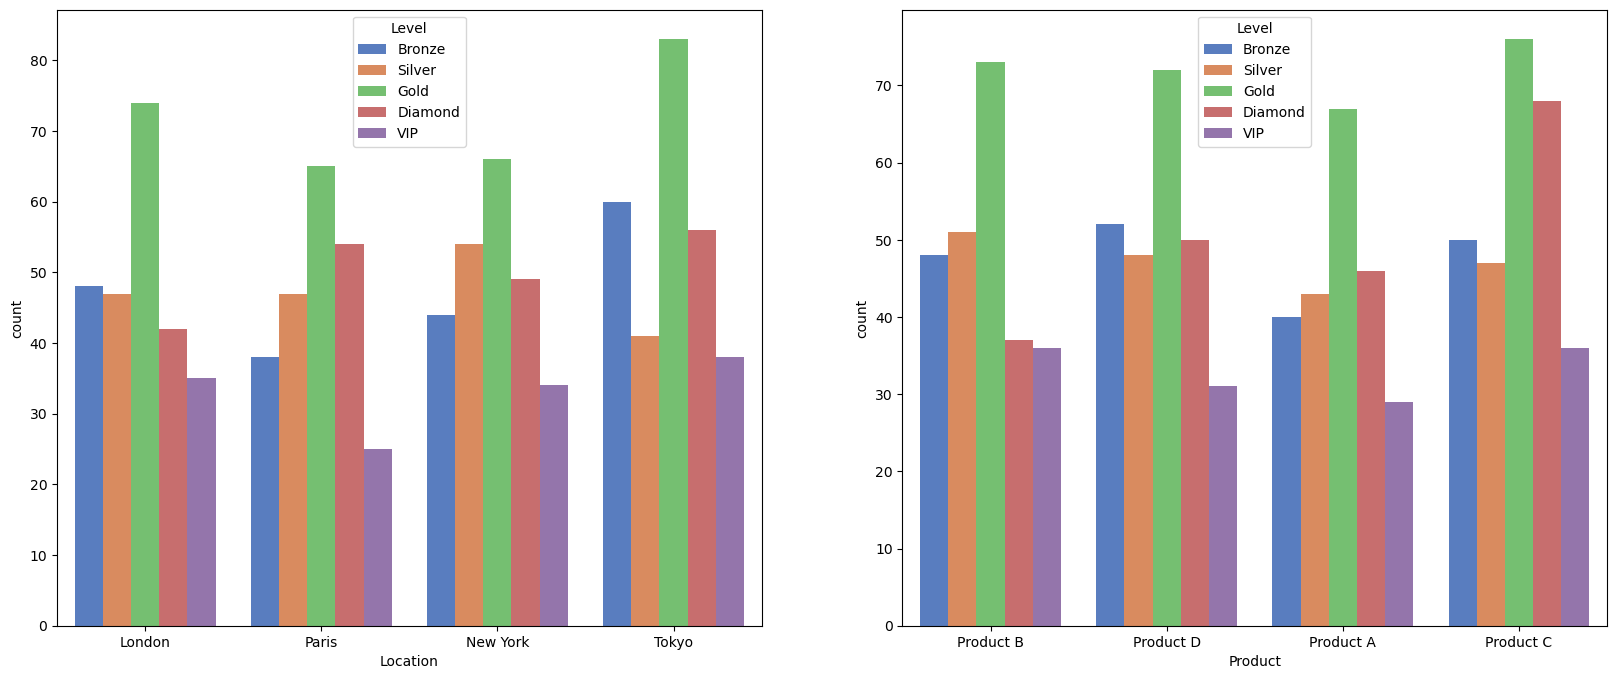

In [30]:
# 1행 1열 서브 플롯 만들기, 크기는 20x8
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 범례
order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

# 도식화 진행, 서브플롯 axes을 사용하여 그리기
# x축 Location 데이터 사용, hue은 Level 데이터에 따라 색상 구분
# explode을 사용하여 Location list 풀어주기, 색상 팔레트 muted, 범례 순서 지정
sns.countplot(ax=axes[0], x='Location', hue='Level', data=new_df.explode('Location'), palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Product', hue='Level', data=new_df.explode('Product'), palette='muted', hue_order=order_columns)

##### 📌 지역 별 회원 등급 분포
- 런던은 Gold 회원이 가장 많으며, VIP 회원이 가장 적다.
- Gold, Bronze, Silver, Diamond, VIP 회원 순으로 나타난다.
<br><br>
- 파리는 Gold 회원이 가장 많으며, VIP 회원이 가장 적다.
- Gold, Diamond, Silver, Bronze, VIP 회원 순으로 나타난다.
<br><br>
- 뉴욕은 Gold 회원이 가장 많으며, VIP 회원이 가장 적다.
- Gold, Silver, Diamond, Bronze, VIP 회원 순으로 나타난다.
<br><br>
- 도쿄는 Gold 회원이 가장 많으며, Silver 회원이 가장 적다.
- Gold, Bronze, Diamond, VIP, Silver 회원 순으로 나타난다.
<br><br>
<br><br>
##### 📌 판매상품 별 회원 등급 분포
- Product B는 Gold 회원이 가장 많이 구매했으며, Diamond 회원이 가장 적게 구매했다.
- Gold, Silver, Bronze, VIP, Diamond 회원 순으로 나타난다.
<br><br>
- Product D는 Gold 회원이 가장 많이 구매했으며, VIP 회원이 가장 적게 구매했다.
- Gold, Bronze, Silver, Diamond, VIP 회원 순으로 나타난다.
<br><br>
- Product A는 Gold 회원이 가장 많이 구매했으며, VIP 회원이 가장 적게 구매했다.
- Gold, Diamond, Silver, Bronze, VIP 회원 순으로 나타난다.
<br><br>
- Product C는 Gold 회원이 가장 많이 구매했으며, VIP 회원이 가장 적게 구매했다.
- Gold, Diamond, Bronze, Silver, VIP 회원 순으로 나타난다.

### 마케팅 전략 제안
- 각 등급에 따른 할인 혹은 혜택을 제공하여, 고객의 충성도를 높이고 이탈을 방지한다.
- 구매율이 높은 'Gold' 등급의 고객을 대상으로 할인 혹은 혜택을 제공하여 고객의 충성도를 높이고 이탈을 방지한다.
- 'VIP' 등급의 고객의 구매율이 높은 Product C와 유사한 제품 또는 서비스를 홍보, 할인, 혜텍 제공하는 것이 효과적이다.
- 오랫동안 방문하지 않은 회원을 대상으로 복귀 관련 혜택을 제공하여 이탈된 고객들을 되찾는다.